Importing the libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

Loading the dataset

In [46]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Sales_data.csv")

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


Reading the dataset

In [67]:
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


Removing extra columns

In [47]:
data.drop(columns="Unnamed: 0",inplace=True)
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


Cleaning the data

In [48]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Finding the mean, max, min, standard deviation of the data

In [49]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [50]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Showing the relationship between Columns

<Axes: xlabel='Newspaper', ylabel='Sales'>

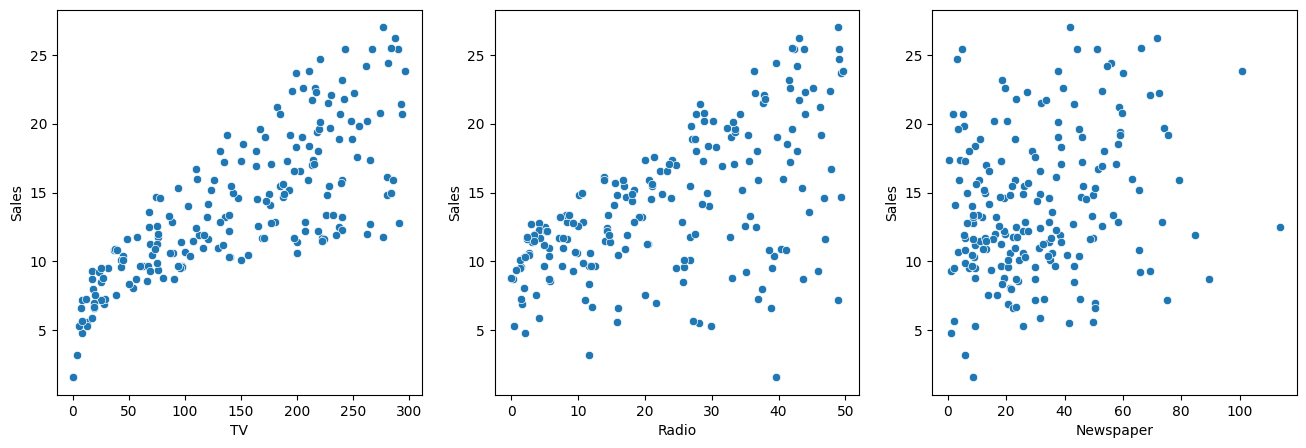

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.scatterplot(data=data,x="TV",y="Sales")
plt.subplot(1,3,2)
sns.scatterplot(data=data,x="Radio",y="Sales")
plt.subplot(1,3,3)
sns.scatterplot(data=data,x="Newspaper",y="Sales")

In [52]:
x=data.iloc[:,:-1]
y=data["Sales"]

In [54]:
pf=PolynomialFeatures(degree=2)
x=pf.fit_transform(x)

Dividing the dataset into training and testing data

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model development

In [57]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [58]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred = rf_model.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.33
R-squared: 0.99


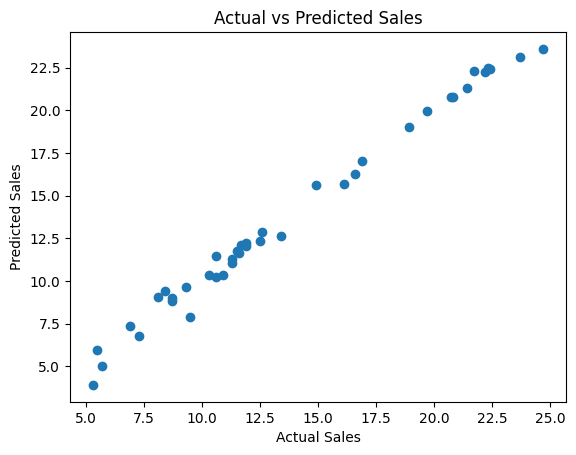

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

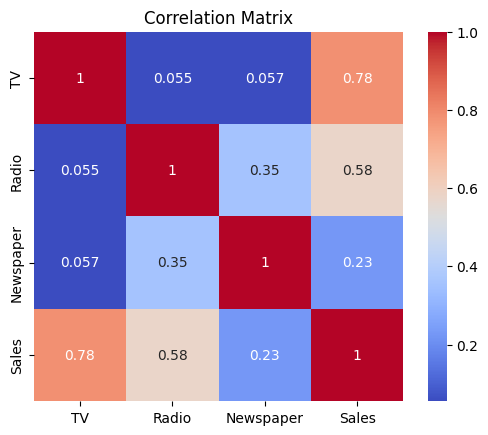

In [66]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()